Протестуйте описані в лекції методи і моделі на датасеті AirPassenger.csv, що міститься на GitHub в папці лекції та містить дані про коливання кількостіф пасажирів авіаліній із часом.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf

# Завантаження датасету
df_air = pd.read_csv('AirPassengers.csv')
df_air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


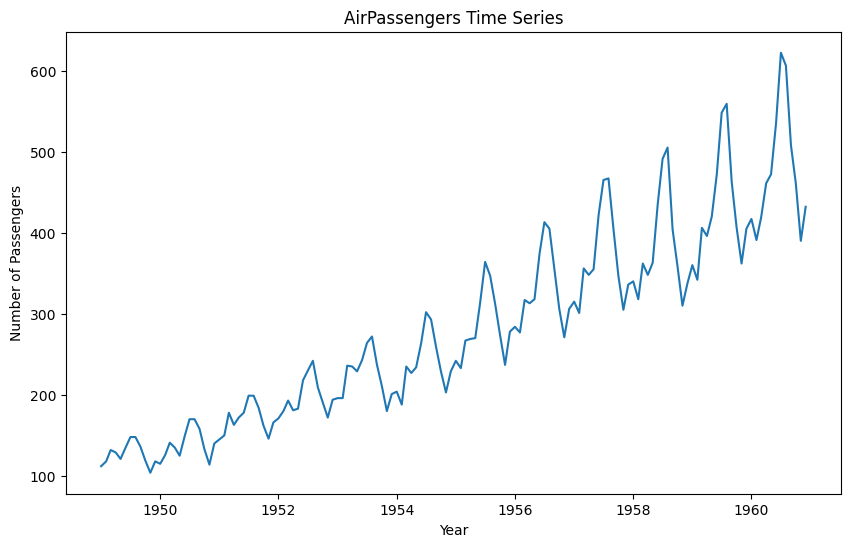

In [28]:
# Перетворення стовпця дати у формат datetime
df_air['Month'] = pd.to_datetime(df_air['Month'], format='%Y-%m')

# Встановлення стовпця дати як індексу
df_air.set_index('Month', inplace=True)

# Візуалізація часового ряду
plt.figure(figsize=(10, 6))
plt.plot(df_air)
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('AirPassengers Time Series')
plt.show()

In [31]:
# Побудова моделі ARIMA
# Встановлення частоти "MS" для місячного ряду
df_air = df_air.asfreq('MS')
model_arima = ARIMA(df_air, order=(1, 1, 1), freq='MS')
model_arima_fit = model_arima.fit()

In [32]:
# Побудова моделі SARIMA
model_sarima = SARIMAX(df_air, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), freq='MS')
model_sarima_fit = model_sarima.fit()

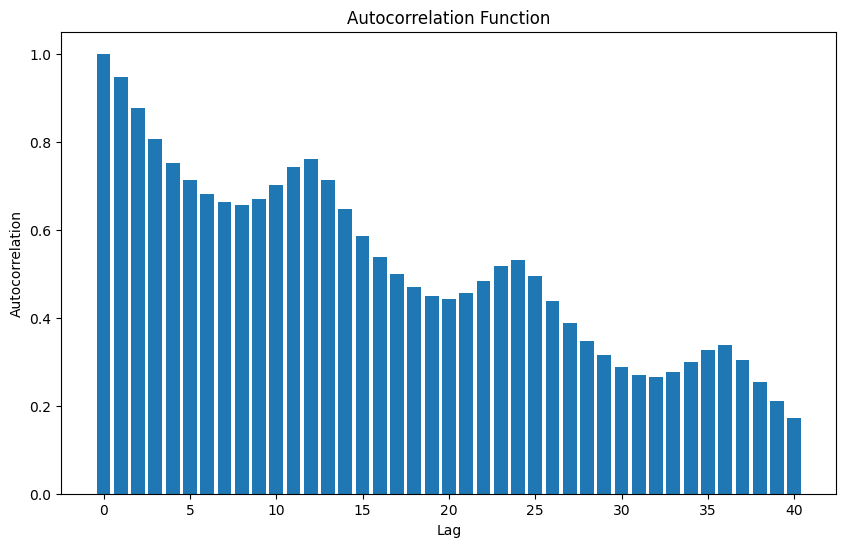

In [33]:
# Автокореляційна функція
autocorr = acf(df_air, nlags=40)

# Візуалізація автокореляційної функції
plt.figure(figsize=(10, 6))
plt.bar(range(len(autocorr)), autocorr)
plt.title('Autocorrelation Function')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [34]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

# Розділення датасету на навчальні та тестові дані
train_df_air = df_air[:'1958']
test_df_air = df_air['1959':]

Mean Squared Error (AR): 732.97


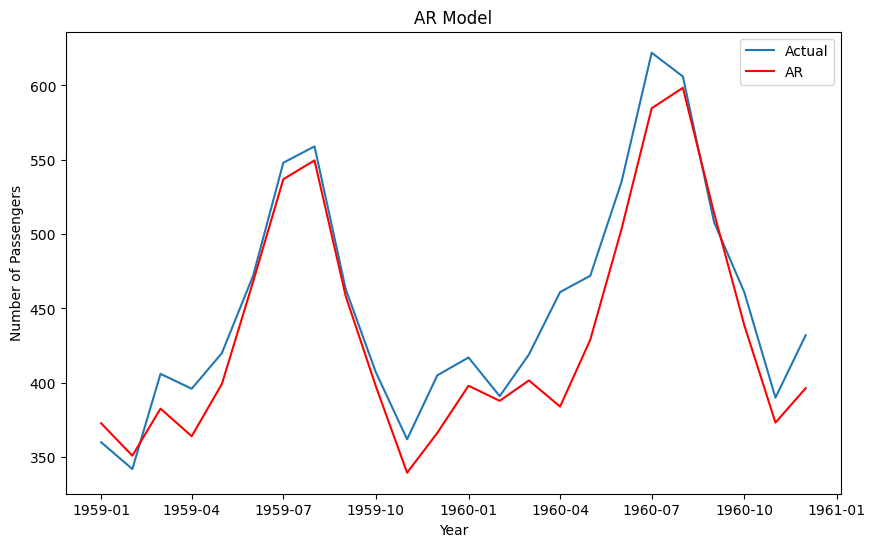

In [35]:
# Побудова моделі авторегресії
model_ar = AutoReg(train_df_air, lags=12)
model_ar_fit = model_ar.fit()

# Прогнозування на тестових даних
predictions_ar = model_ar_fit.predict(start=len(train_df_air), end=len(train_df_air)+len(test_df_air)-1)

# Оцінка моделі авторегресії
mse_ar = mean_squared_error(test_df_air, predictions_ar)
print(f'Mean Squared Error (AR): {mse_ar:.2f}')

# Візуалізація прогнозів та фактичних значень
plt.figure(figsize=(10, 6))
plt.plot(test_df_air, label='Actual')
plt.plot(predictions_ar, color='red', label='AR')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('AR Model')
plt.legend()
plt.show()

In [46]:
# ARIMA модель
def fit_arima(train, test):
    model = ARIMA(train, order=(2, 1, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))[0]
    return forecast

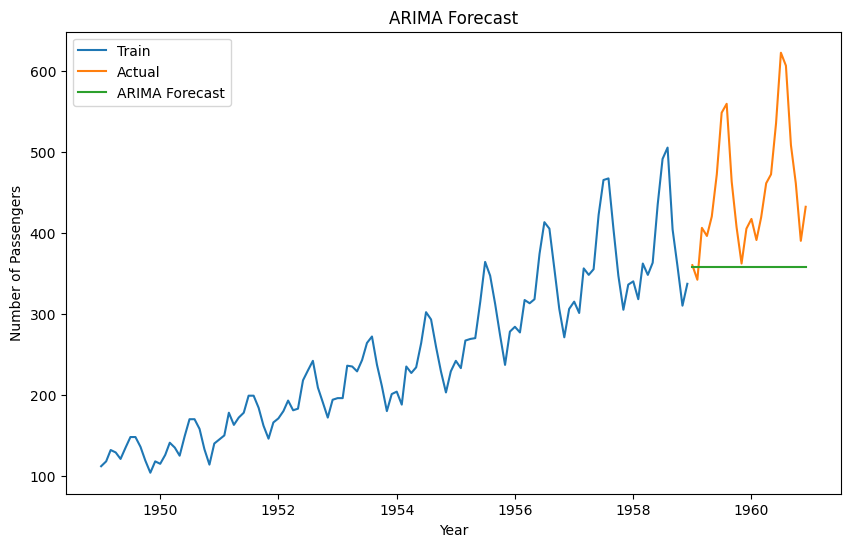

In [49]:
# ARIMA модель - оцінка та візуалізація
arima_forecast = fit_arima(train_df_air, test_df_air)

plt.figure(figsize=(10, 6))
plt.plot(train_df_air, label='Train')
plt.plot(test_df_air, label='Actual')
plt.plot(test_df_air.index, np.repeat(arima_forecast, len(test_df_air)), label='ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [50]:
# SARIMA модель
def fit_sarima(train, test):
    model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    return forecast

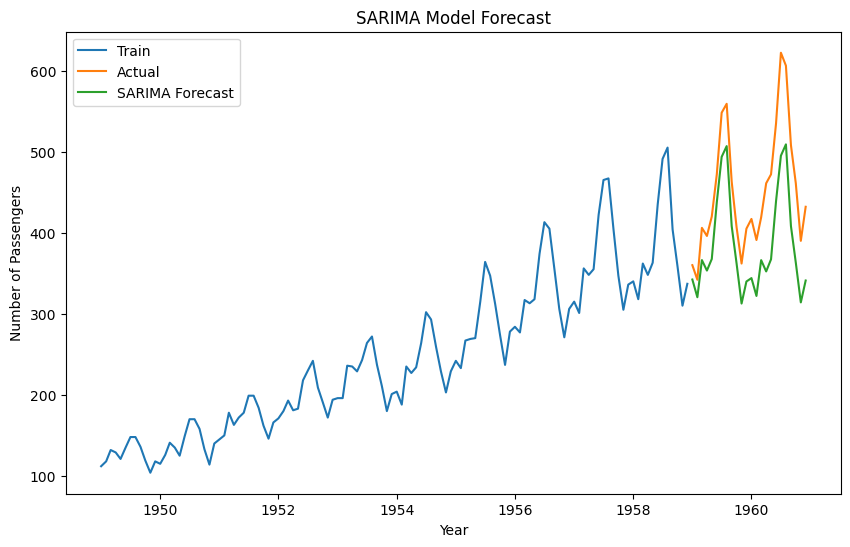

In [51]:
# SARIMA модель - оцінка та візуалізація
sarima_forecast = fit_sarima(train_df_air, test_df_air)

plt.figure(figsize=(10, 6))
plt.plot(train_df_air, label='Train')
plt.plot(test_df_air, label='Actual')
plt.plot(test_df_air.index, sarima_forecast, label='SARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

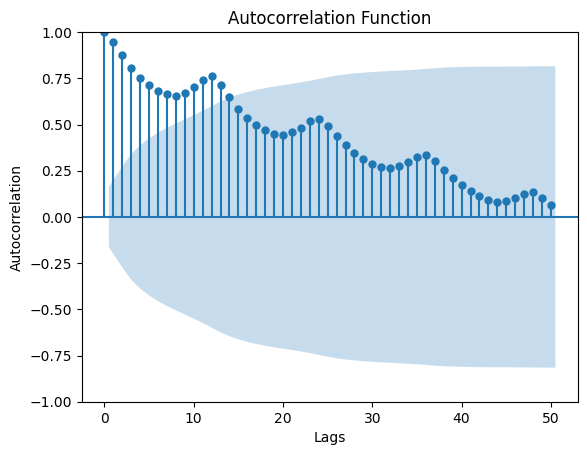

In [52]:
# Візуалізація автокореляційної функції
plt.figure(figsize=(10, 6))
plot_acf(df_air, lags=50)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()

In [54]:
# Оцінка моделей
arima_rmse = np.sqrt(np.mean((arima_forecast - test_df_air.values)**2))
sarima_rmse = np.sqrt(np.mean((sarima_forecast.values - test_df_air.values)**2))

print(f'ARIMA RMSE: {arima_rmse}')
print(f'SARIMA RMSE: {sarima_rmse}')

ARIMA RMSE: 120.73266296463865
SARIMA RMSE: 118.07393917018426
